In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import json
import math
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

In [3]:
list_of_devices = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = devicesDf.groupby('Hour')

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
X = np.array(devicesDf.drop(['Device_id', 'Request_size'], axis = 1))

#linkage = sch.linkage(X, method  = "ward")

hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')

y_hc=hc.fit_predict(X)

In [6]:
hc.labels_
devicesDf['K-class'] = hc.labels_
devicesDf

,Hour,Device_id,Class_of_service,Fog_latency_1,Fog_latency_2,Fog_latency_3,Cloud_latency,Request_size,Regions,K-class
0,0,3b6171db-988d-4395-80f1-9b4880c8ee5d,10,197.059911,99.059911,1.059911,196,253,2.510815,3
1,0,6ad0095a-5c40-4850-b603-35791257a5e9,100,38.012869,136.012869,234.012869,196,392,0.112114,2
2,0,cbb01ed1-2950-493e-80ff-dd492c3c34e8,10,194.861381,96.861381,1.138619,196,81,2.488381,3
3,0,467dd055-5749-461d-9f22-fa027b07d9ba,100,141.717889,43.717889,54.282111,196,218,1.946101,1
4,0,32d6a9d1-1dae-4338-93b0-07c114dbf6a7,10,150.333943,52.333943,45.666057,196,386,2.034020,1
...,...,...,...,...,...,...,...,...,...,...
15961,23,d7885bc2-6091-4f99-976d-3ba3ba9ac181,100,152.237091,54.237091,43.762909,196,289,2.053440,1
15962,23,fcd874af-a4b4-4cae-a3f1-66d8105bf8a3,10,220.985557,122.985557,24.985557,196,799,2.754955,3
15963,23,7cc2b16d-8ec1-4151-89dd-5e2da676aca1,100,118.604026,20.604026,77.395974,196,440,1.710245,1
15964,23,939b30de-52c1-435d-b6b4-80b34d57862e,10,227.755986,129.755986,31.755986,196,532,2.824041,3


Latencia média =  24.622572776610042


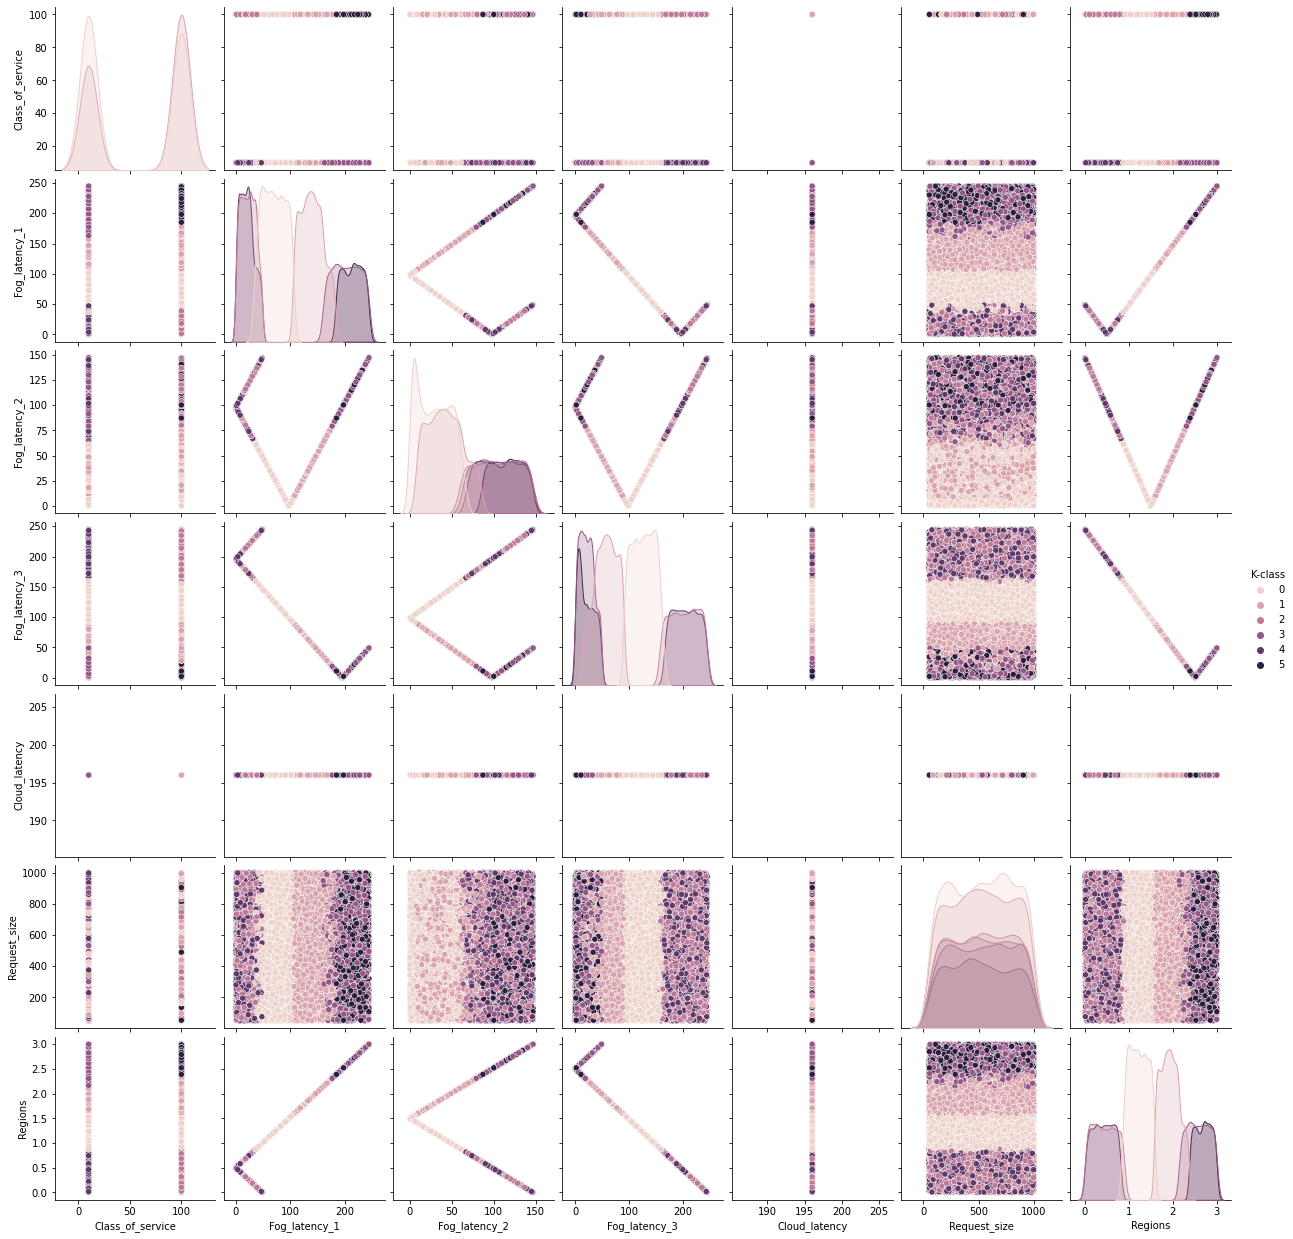

In [7]:
sum_smallest_latency = 0

for index in range(len(devicesDf)):
    smallest_latency = min([devicesDf["Fog_latency_1"].iloc[index], devicesDf["Fog_latency_2"].iloc[index], devicesDf["Fog_latency_3"].iloc[index]])
    sum_smallest_latency += smallest_latency

media_latency = sum_smallest_latency / devicesDf.shape[0]

print("Latencia média = ", media_latency)

sb.pairplot(devicesDf, hue="K-class")

<h1>ploting line graph standard and priority workload by time</h1>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0
quantidade dispositivos prioritarios =  9
quantidade dispositivos standard =  9
Menor latencia media =  13.149953746195827
latencia média por prioridade =  111.14995374619583
Horário =  1
quantidade dispositivos prioritarios =  18
quantidade dispositivos standard =  18
Menor latencia media =  11.640422143976792
latencia média por prioridade =  109.64042214397679
Horário =  2
quantidade dispositivos prioritarios =  35
quantidade dispositivos standard =  35
Menor latencia media =  11.508946725060758
latencia média por prioridade =  109.50894672506077
Horário =  3
quantidade dispositivos prioritarios =  64
quantidade dispositivos standard =  64
Menor latencia media =  11.48944190540763
latencia média por prioridade =  109.48944190540763
Horário =  4
quantidade dispositivos prioritarios =  108
quantidade dispositivos standard =  108
Menor latencia media =  11.432733934707635
latencia média p

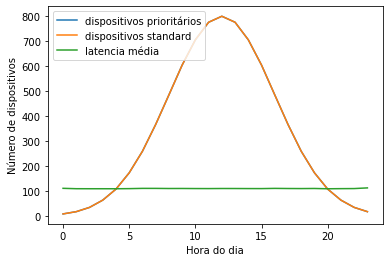

In [8]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import AgglomerativeClustering 

list_of_devices = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0

    for index in range(len(df_by_hour[str(i)])):
        if df_by_hour[str(i)]['Class_of_service'].iloc[index] == 100:
            smallest_latency = min([df_by_hour[str(i)]["Fog_latency_1"].iloc[index], df_by_hour[str(i)]["Fog_latency_2"].iloc[index], df_by_hour[str(i)]["Fog_latency_3"].iloc[index]])
            sum_smallest_latency += smallest_latency
            num_priority += 1
            latency_by_priority += smallest_latency
        else:
            num_standard += 1
            latency_by_priority += df_by_hour[str(i)]['Cloud_latency'].iloc[index]

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    media_smallest_latency = sum_smallest_latency / df_by_hour[str(i)].shape[0]
    X = np.array(df_by_hour[str(i)].drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

    #aplicação do Ward Linkage
    hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')
    y_hc=hc.fit_predict(X)

    df_by_hour[str(i)]['K-class'] = hc.labels_

    print("quantidade dispositivos prioritarios = ", num_priority)
    print("quantidade dispositivos standard = ", num_standard)

    print("Menor latencia media = ", media_smallest_latency)
    print("latencia média por prioridade = ", media_priority_latency)

    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

## Function: alocation_by_priority<br>
Devices alocation based on priority of execution.<br>
Priority devices are connected to the fog nodes and standard devices are connected to the cloud processing node.

### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [9]:
def alocation_by_priority(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if devices_regions[int(region)][index]["Class_of_service"] == 100 and len(processing_nodes[int(region)].connected_devices) < processing_nodes[int(region)].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                #fog_node_id = "Fog_latency_" + str(region+1)
                #latency_by_priority += devices_regions[region][index][fog_node_id]
                #num_priority += 1
            else:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                #if devices_regions[region][index]["Class_of_service"] == 100:
                #    latency_by_priority += devices_regions[region][index]["standard_latency"]
                #else:
                #    standard_latency += devices_regions[region][index]["standard_latency"]
                #num_standard += 1

    for region in range(len(processing_nodes)):
        for devices in processing_nodes[region].connected_devices:
            fog_node_id = "Fog_latency_" + str(region+1)
            if devices["Class_of_service"] == 100:
                num_priority += 1
                if region == 3:
                    latency_by_priority += devices["Cloud_latency"]
                else:
                    latency_by_priority += devices[fog_node_id]
            elif devices["Class_of_service"] == 10:
                num_standard += 1
                if region == 3:
                    standard_latency += devices["Cloud_latency"]
                else:
                    standard_latency += devices[fog_node_id]
    
    return latency_by_priority, standard_latency, num_priority, num_standard

## Function: fog_first_alocation<br>
Fog first alocation aims to use all capacity of the fog nodes before starts to use the cloud processing node.<br>
Devices that are standard and are connected to the fog node can be relocated to the cloud if a priority user needs to processed in the fog node.

### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [10]:
def fog_first_alocation(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0
    
    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            fog_node_id = "Fog_latency_" + str(region+1)
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
            else:
                # search for no_priority device connected to fog node
                non_priority_in_fog = False
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        non_priority_in_fog = True
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        
                        # connect no-priority device on cloud node    
                        processing_nodes[-1].connected_devices.append(
                            no_priority_device)

                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])
                        break
                # if no no-priority device is found, just connect to the cloud
                if non_priority_in_fog == False:
                    processing_nodes[-1].connected_devices.append(
                        devices_regions[region][index])

    for region in range(len(processing_nodes)):
        for devices in processing_nodes[region].connected_devices:
            fog_node_id = "Fog_latency_" + str(region+1)
            if devices["Class_of_service"] == 100:
                num_priority += 1
                if region == 3:
                    latency_by_priority += devices["Cloud_latency"]
                else:
                    latency_by_priority += devices[fog_node_id]
            elif devices["Class_of_service"] == 10:
                num_standard += 1
                if region == 3:
                    standard_latency += devices["Cloud_latency"]
                else:
                    standard_latency += devices[fog_node_id]

    print("numero prioritarios: ", num_priority)
    print("numero standard: ", num_standard)
    return latency_by_priority, standard_latency, num_priority, num_standard

## Function: alocation_cloud_only<br>
Cloud only aims to use only the processing capacity of the cloud node not caring about its processing capacity. If the demand is greater, devices are alocated to a processing queue.
### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [11]:
def alocation_cloud_only(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if len(processing_nodes[-1].connected_devices) < processing_nodes[-1].device_capacity:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                #latency_by_priority += devices_regions[region][index]["Cloud_latency"]
                #num_priority += 1
            else:
                non_priority_processing = False
                for device_index in range(len(processing_nodes[-1].connected_devices)):
                    if processing_nodes[-1].connected_devices[device_index]["Class_of_service"] == 10:
                        non_priority_processing = True
                        no_priority_device = processing_nodes[-1].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[-1].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node  
                        processing_nodes[-1].queue_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[-1].connected_devices.append(devices_regions[region][index])

                        break
                
                # if no no-priority device is found, just connect to the cloud
                if non_priority_processing == False:
                    processing_nodes[-1].queue_devices.append(
                        devices_regions[region][index])
                    #cloud_latency += devices_regions[region][index]["Cloud_latency"] + (len(processing_nodes[-1].queue_devices) * 100)
                    #num_standard += 1

    count_devices = 0
    for devices in processing_nodes[-1].connected_devices:
        if devices["Class_of_service"] == 100:
            num_priority += 1
            latency_by_priority += devices["Cloud_latency"]
        elif devices["Class_of_service"] == 10:
            num_standard += 1
            standard_latency += devices["Cloud_latency"]

    for devices in processing_nodes[-1].queue_devices:
        if devices["Class_of_service"] == 100:
            num_priority += 1
            count_devices += 1
            latency_by_priority += devices["Cloud_latency"] + (count_devices * 100)
        elif devices["Class_of_service"] == 10:
            num_standard += 1
            count_devices += 1
            standard_latency += devices["Cloud_latency"] + (count_devices * 100)

    
    return latency_by_priority, standard_latency, num_priority, num_standard

## Function: alocation_fog_only<br>
Fog only aims to use only the processing capacity of the fog node not caring about its processing capacity. If the demand is greater, devices are alocated to a processing queue.
### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [12]:
def alocation_fog_only(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                #fog_node_id = "Fog_latency_" + str(region+1)
                #latency_by_priority += devices_regions[region][index][fog_node_id]
                #num_priority += 1
            else:
                non_priority_processing = False
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        non_priority_processing = True
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node    
                        processing_nodes[region].queue_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])

                        break
                
                if non_priority_processing == False:
                    # if no no-priority device in found, just connect to the cloud
                    processing_nodes[region].queue_devices.append(
                        devices_regions[region][index])
                    #fog_node_id = "Fog_latency_" + str(region+1)
                    #cloud_latency += devices_regions[region][index][fog_node_id] + (len(processing_nodes[region].queue_devices) * 100)

                #num_standard += 1
    for region in range(len(processing_nodes) - 1):
        count_devices = 0
        fog_node_id = "Fog_latency_" + str(region+1)
        for devices in processing_nodes[region].connected_devices:
            if devices["Class_of_service"] == 100:
                num_priority += 1
                latency_by_priority += devices[fog_node_id]
            else:
                standard_latency += devices[fog_node_id]
                num_standard += 1
        for devices in processing_nodes[region].queue_devices:
            print(devices)
            if devices["Class_of_service"] == 100:
                num_priority += 1
                count_devices += 1
                latency_by_priority += devices[fog_node_id] + (count_devices * 100)
                print("queue devices: ", count_devices)
                print("latency queued: ", latency_by_priority)
            else:
                num_standard += 1
                count_devices += 1
                standard_latency += devices[fog_node_id] + (count_devices * 100)

    print("############ FOGS ############")
    print("fog 0 connected: ", len(processing_nodes[0].connected_devices))
    print("fog 0 queue: ", len(processing_nodes[0].queue_devices))
    print("fog 1 connected: ", len(processing_nodes[1].connected_devices))
    print("fog 1 queue: ", len(processing_nodes[1].queue_devices))
    print("fog 2 connected: ", len(processing_nodes[2].connected_devices))
    print("fog 2 queue: ", len(processing_nodes[2].queue_devices))

    return latency_by_priority, standard_latency, num_priority, num_standard

### Clustering and getting ready for alocation processes

In [2]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import AgglomerativeClustering 
import utilities
import time
import timeit

list_of_devices = []

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

devices_regions_by_hour = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        for fog_latency in range(len(t['latency'])):
            device.append(t['latency'][fog_latency])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service',
                         'Fog_latency_1', 'Fog_latency_2', 'Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])

df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))

# loop by hour of the workload database
for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)

    # removing some unused columns
    X = np.array(df_by_hour[str(i)].drop(
        ['Device_id', 'Hour', 'Request_size'], axis=1))

    #aplicação do Ward Linkage
    hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward', compute_distances=True)
    y_hc=hc.fit_predict(X)

    # add cluster label to each device
    df_by_hour[str(i)]['K-class'] = hc.labels_

    centers = np.array(hc.distances_)

    # get region centroid for each cluster and put it on a list with the cluster label
    # gonna be used to define the processing node each device will go depending of the cluster they're in
    ordered_clusters = []
    for cluster_index in range(len(centers)):
        # hardcoded -1 - last element on the centers is the centroid of the region
        ordered_clusters.append((centers[cluster_index][-1], cluster_index))

    # sort list of centroid and label of each cluster by the centroid
    ordered_clusters.sort()
    print(ordered_clusters)

    # list of devices for each region
    devices_regions = []
    devices_region_1 = []
    devices_region_2 = []
    devices_region_3 = []

    # loop through all devices in this hour
    # and stores than in its own region to be connected
    for devices in range(len(df_by_hour[str(i)])):
        device = df_by_hour[str(i)]['K-class'].iloc[devices]

        # ordered_cluster getting the index of the k-class refering to each region
        if device == ordered_clusters[0][1] or device == ordered_clusters[1][1]:
            devices_region_1.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[2][1] or device == ordered_clusters[3][1]:
            devices_region_2.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[4][1] or device == ordered_clusters[5][1]:
            devices_region_3.append(df_by_hour[str(i)].iloc[devices])

    devices_regions.append(devices_region_1)
    devices_regions.append(devices_region_2)
    devices_regions.append(devices_region_3)

    devices_regions_by_hour.append(devices_regions)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0


IndexError: invalid index to scalar variable.

In [3]:
hc.distances_

array([  2.51913824,   3.01923676,   3.20092003,   5.13224311,
        16.40124748,  18.80787245,  29.81986753,  35.90898987,
        50.53299502,  76.72232805, 110.56075438, 117.56483712,
       128.5374005 , 148.337516  , 189.92060956, 255.01684385,
       556.46185497])

In [ ]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import utilities
import time
import timeit

list_of_devices = []

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

devices_regions_by_hour = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        for fog_latency in range(len(t['latency'])):
            device.append(t['latency'][fog_latency])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service',
                         'Fog_latency_1', 'Fog_latency_2', 'Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])

df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))

# loop by hour of the workload database
for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)

    # removing some unused columns
    X = np.array(df_by_hour[str(i)].drop(
        ['Device_id', 'Hour', 'Request_size'], axis=1))

    #aplicação do Ward Linkage
    # hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward', compute_distances=True)
    # y_hc=hc.fit_predict(X)

    hc = linkage(X, method='ward', metric="euclidean")
    hc.fit_predict()

    # add cluster label to each device
    df_by_hour[str(i)]['K-class'] = hc.labels_

    centers = np.array(hc.distances_)

    # get region centroid for each cluster and put it on a list with the cluster label
    # gonna be used to define the processing node each device will go depending of the cluster they're in
    ordered_clusters = []
    for cluster_index in range(len(centers)):
        # hardcoded -1 - last element on the centers is the centroid of the region
        ordered_clusters.append((centers[cluster_index][-1], cluster_index))

    # sort list of centroid and label of each cluster by the centroid
    ordered_clusters.sort()
    print(ordered_clusters)

    # list of devices for each region
    devices_regions = []
    devices_region_1 = []
    devices_region_2 = []
    devices_region_3 = []

    # loop through all devices in this hour
    # and stores than in its own region to be connected
    for devices in range(len(df_by_hour[str(i)])):
        device = df_by_hour[str(i)]['K-class'].iloc[devices]

        # ordered_cluster getting the index of the k-class refering to each region
        if device == ordered_clusters[0][1] or device == ordered_clusters[1][1]:
            devices_region_1.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[2][1] or device == ordered_clusters[3][1]:
            devices_region_2.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[4][1] or device == ordered_clusters[5][1]:
            devices_region_3.append(df_by_hour[str(i)].iloc[devices])

    devices_regions.append(devices_region_1)
    devices_regions.append(devices_region_2)
    devices_regions.append(devices_region_3)

    devices_regions_by_hour.append(devices_regions)

